1.데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('train.csv')
df.shape

(7352, 563)

In [ ]:
df['Activity'].value_counts().sort_index()

LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

In [ ]:
# 결측치 없음

df.isna().sum(axis=0)


tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
# 이상치 탐지
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
# 데이터 분리
y= df['Activity']
x = df.drop(['Activity','subject'], axis=1)

In [ ]:
y.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

In [ ]:
# np.random.shuffle(y)
# y만 섞으면 안되지 x도 섞어야지

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5881, 561), (1471, 561), (5881,), (1471,))

In [ ]:
# 스케일링 하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_s = ss.fit_transform(x_train)
x_train_s[:5]

array([[ 9.19663331e-02,  1.30721749e+00,  5.13247983e-01, ...,
        -5.93371791e-02,  5.78456457e-01,  1.37425761e+00],
       [-1.30331001e-01, -1.37079161e-01, -2.62974015e-01, ...,
        -7.59382734e-01,  4.15702390e-01,  2.22133707e-01],
       [-1.12187695e-01, -4.08344878e-02,  1.50324748e-01, ...,
         1.97156077e+00, -2.04941910e+00, -1.41641936e+00],
       [ 2.15738968e-03, -1.86533481e-01, -2.33596351e-01, ...,
        -3.82137744e-01,  8.61472726e-01,  3.42492518e-01],
       [ 2.16808666e+00,  2.19561537e-01,  9.54562413e-01, ...,
        -6.01472748e-01,  5.68210191e-01,  5.69539521e-02]])

In [ ]:
x_test
x_test_s = ss.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_s, y_train)

RandomForestClassifier()

In [ ]:
test_dt = pd.read_csv("test.csv")


In [ ]:
# 데이터 분리
y_tes = test_dt['Activity']
x_tes = test_dt.drop(['Activity','subject'], axis=1)

In [ ]:
# 라벨 인코딩(sckitlearn에서는 내부적으로 해줌)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y_tes)
y_tes = le.transform(y_tes)
y_tes

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
# x는 스케일링
# 스케일링 하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_tes_s = ss.fit_transform(x_tes)
x_tes_s[:5]

array([[-0.2777081 , -0.21063123,  2.19307573, ..., -0.40479042,
         0.62272321, -0.0383485 ],
       [ 0.19865964,  0.18259066, -0.25026383, ..., -0.36173867,
         0.63673075, -0.14570918],
       [ 0.02458676, -0.31805537, -0.22848456, ..., -0.37093228,
         0.63284514, -0.12685534],
       [-0.06105694, -0.57303707, -0.21370947, ..., -0.36343378,
         0.64527635, -0.11758463],
       [ 0.01382276, -0.38788085, -0.49463907, ..., -0.35025636,
         0.6656567 , -0.10411803]])

In [ ]:
y_pred = rfc.predict(x_tes_s)
# 정확도

In [ ]:
from sklearn.metrics import accuracy_score

print('정확도:', accuracy_score(y_tes, y_pred))

정확도: 0.0


In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[50, 100, 150, 200]
}
rfc = RandomForestClassifier()

grid_cv = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
grid_cv.fit(x_train_s, y_train)

CPU times: user 12.5 s, sys: 189 ms, total: 12.7 s
Wall time: 2min 27s


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, 200]})

In [ ]:
grid_cv.best_params_

{'max_depth': 200}

In [ ]:
grid_cv.best_estimator_.score(x_test_s, y_test)


0.9843643779741672

In [ ]:
from sklearn.svm import SVC

clf_svc = SVC(kernel = 'linear')
clf_svc.fit(x_train_s, y_train)

SVC(kernel='linear')

In [ ]:
clf_svc.score(x_test_s, y_test)

0.9870836165873556

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dt =DecisionTreeClassifier()
clf_dt.fit(x_train_s, y_train)

DecisionTreeClassifier()

In [ ]:
clf_dt.score(x_test_s, y_test)

0.9320190346702923

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train_s, y_train)

DecisionTreeClassifier()

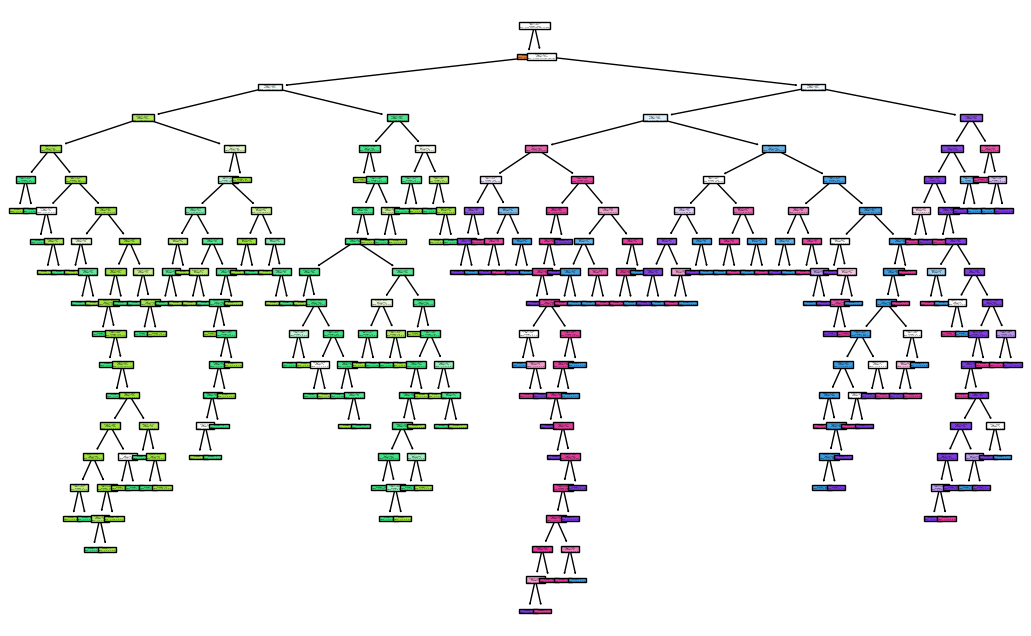

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(13,8))
plot_tree(clf,filled=True)
plt.show()

In [205]:
from sklearn.decomposition import PCA

In [208]:
pca = PCA(n_components=10)
x_train_p = pca.fit_transform(x_train_s)

In [209]:
x_train_p.shape

(5881, 10)

In [210]:
x_test_p = pca.transform(x_test_s)

In [211]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train_p, y_train)

RandomForestClassifier(random_state=0)

In [212]:
rfc.score(x_test_p, y_test)

0.8817131203263087

In [ ]:
# 같은 정확도라면 모델이 간단한 게 좋음, 피쳐의 수가 적은 게 좋음
